In [40]:
import numpy as np
import csv
import matplotlib.pyplot as plt

#Grid point characteristics

class Grid_point:
    def __init__(self, r, theta, phi, beam, g):
        self.r = r
        self.theta = theta
        self.phi = phi
        self.beam = beam
        self.g = g

class Microphone:
    def __init__(self, r, theta, phi):
        self.r = r
        self.theta = theta
        self.phi = phi

#Transform microphone positions to spherical coordinates
        
def get_spherical_from_cart(cart_coord):
    spher_coord = []
    for i in range(len(cart_coord)):
        r = np.sqrt(cart_coord[i][0]**2 + cart_coord[i][1]**2) #distance to a point from the center, from Pithagoras
        theta = np.arctan2(cart_coord[i][1], cart_coord[i][0])
        spher_coord.append([r,theta*180/np.pi,0])
    return spher_coord

#Calculate the steering vectors 

def get_steering_vector(scan_r, scan_theta, scan_phi):
    g = []
    for i in range(len(m)):
        dist = np.sqrt((scan_r*np.sin(scan_phi*np.pi/180))**2 +
                    (scan_r*np.cos(scan_phi*np.pi/180)*np.cos(scan_theta*np.pi/180) - m[i][0]*np.cos(m[i][1]*np.pi/180))**2 +
                    (scan_r*np.cos(scan_phi*np.pi/180)*np.sin(scan_theta*np.pi/180) - m[i][0]*np.sin(m[i][1]*np.pi/180))**2)
        z = complex(np.cos(2*np.pi*F*dist/C)/(dist), -np.sin(2*np.pi*F*dist/C)/(dist))
        g.append(z)
    g = np.array(g)
    return g

#Main program

#Define constants
C = 343 #m/s - speed of sound
F = 800 #Hz - frequency obtained from spectogram

#Read pressure measurements

p = [] 

with open("D:\carti2022\Python\ANWB.csv", newline='') as drone_file:
    reader = csv.reader(drone_file)
    for row in reader:
        if len(row[0])==0:
            break
        aux = []
        for i in range(len(row)):
            if i!=0 and i!=16 and i!=20 and i!=40 and i<62:
                aux.append(float(row[i]))
        p.append(aux)

p = np.array(p) #Columns (p) are p measurements for the same microphone and diff time instances
          #and rows (p[i]) are for same time instance and different microphones

#Read microphone coordinates

m = [] #Microphone coordinates (x,y) wrt the center of the array

with open("D:\carti2022\Python\config.txt") as m_file:
    for line in m_file:
        words = line.split()
        if words[0]!="1" and words[0]!="17" and words[0]!="21" and words[0]!="41" and words[0]!="63" and words[0]!="64":
            m.append([float(words[1]),float(words[2])])

m = get_spherical_from_cart(m)



In [35]:

#Construct the grid
grid = []

dtheta = 1
dphi = 0.5
phi = 0
r = 100

while phi < 90:
    theta = -180
    while theta < 180:
        grid_point = Grid_point(r, theta, phi, 0, [])
        grid.append(grid_point)
        theta += dtheta
    phi += dphi

#Construct the steering vectors

for i in range(len(grid)):
    grid[i].g = get_steering_vector(grid[i].r, grid[i].theta, grid[i].phi)

#Prepare the plot
    
x_axis = [] #Horizontal axis is theta
y_axis = [] #Vertical axis is phi

theta = -180
while theta < 180:
    x_axis.append(theta)
    theta += dtheta
x_axis.append(180)

phi = 0
while phi < 90:
    y_axis.append(phi)
    phi += dphi
y_axis.append(90)

X,Y = np.meshgrid(x_axis, y_axis)



C:\Users\grig_\AppData\Local\Temp\ipykernel_11936\4143193903.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  beam_map[j][k] = grid[index].beam


At time instant 0.0: o = 54, f = 89.5.


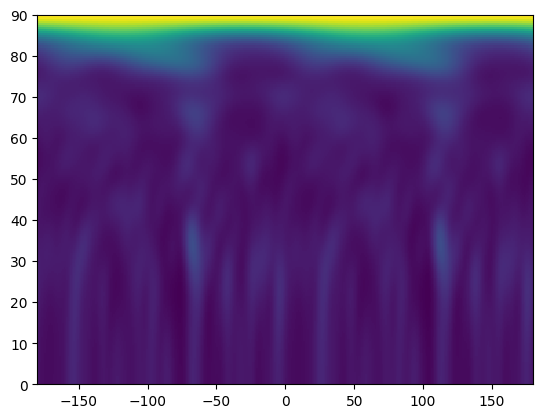

At time instant 83.88608: o = 64, f = 89.5.


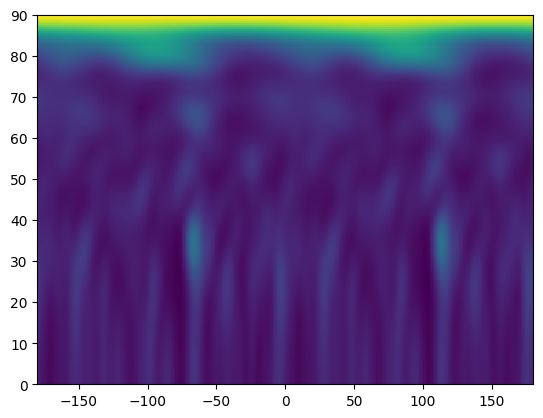

At time instant 167.77216: o = -113, f = 85.5.


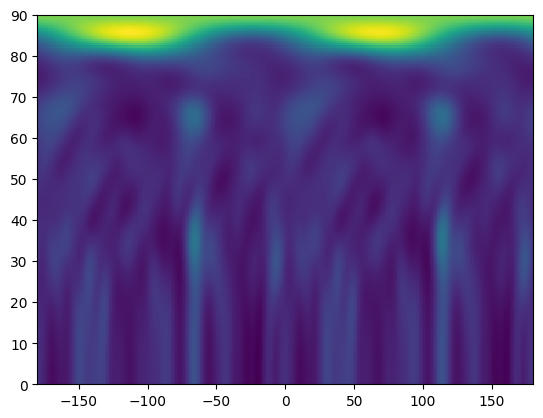

At time instant 251.65824000000003: o = -112, f = 87.0.


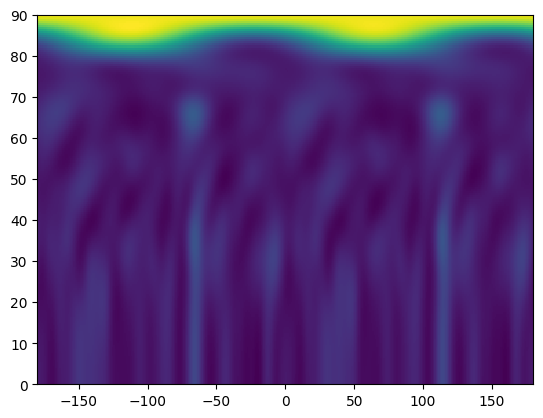

At time instant 335.54432: o = 43, f = 89.5.


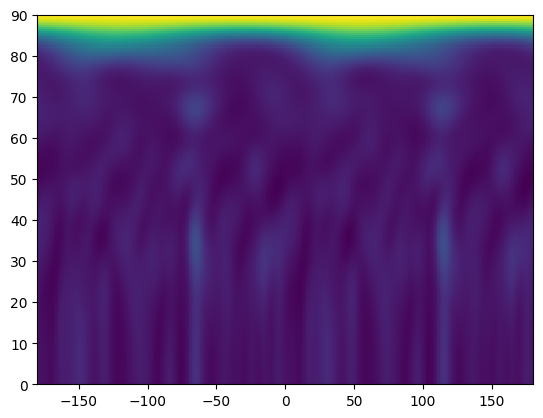

At time instant 419.4304: o = 59, f = 89.5.


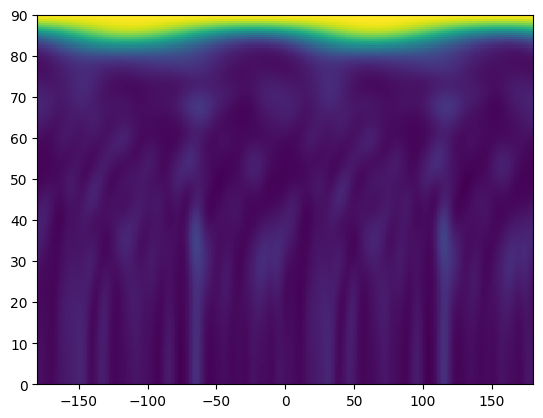

At time instant 503.31648000000007: o = -104, f = 89.5.


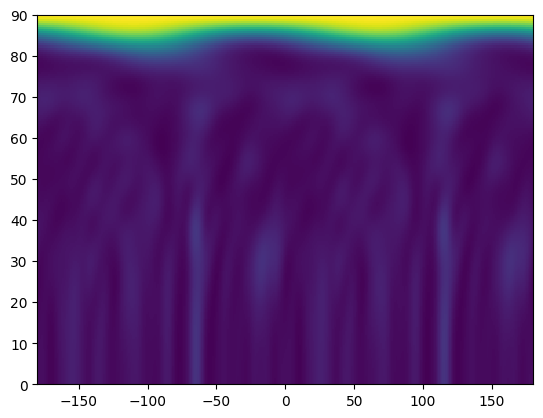

At time instant 587.2025600000001: o = 55, f = 89.5.


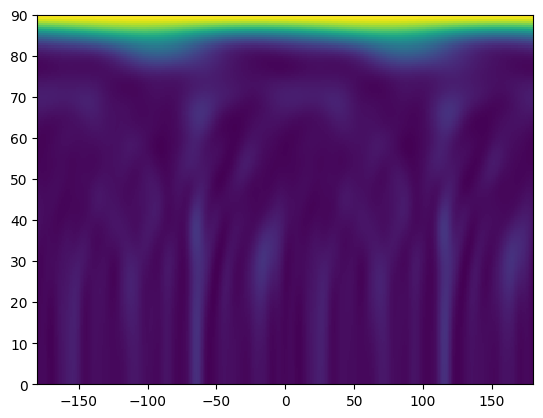

At time instant 671.08864: o = 52, f = 89.5.


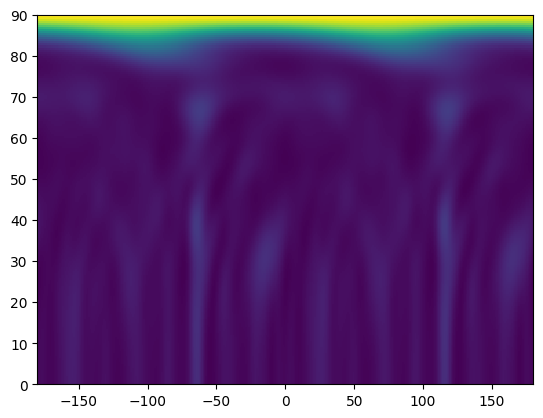

At time instant 754.97472: o = 48, f = 89.5.


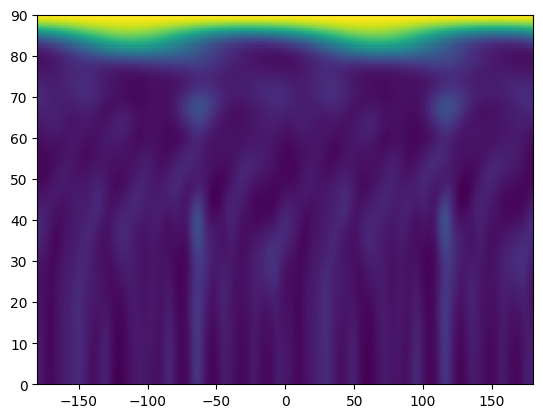

At time instant 838.8608: o = 42, f = 89.5.


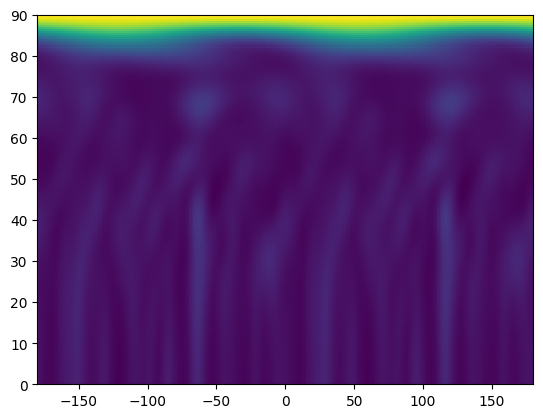

At time instant 922.74688: o = -119, f = 89.5.


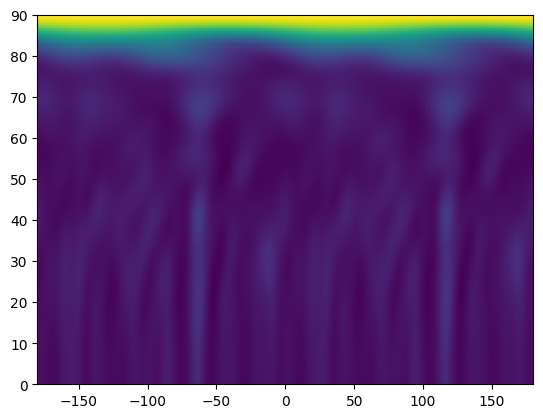

At time instant 1006.6329600000001: o = -84, f = 89.5.


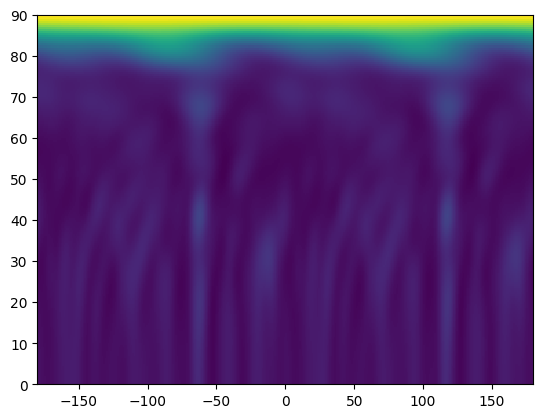

At time instant 1090.5190400000001: o = 47, f = 89.5.


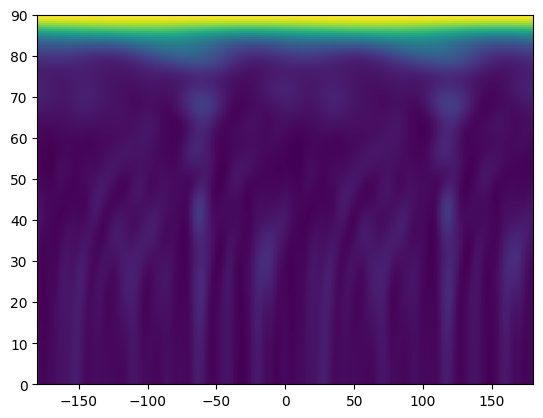

At time instant 1174.4051200000001: o = 37, f = 89.5.


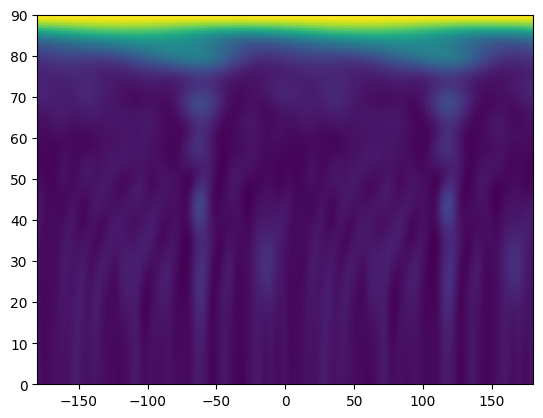

At time instant 1258.2912000000001: o = 38, f = 89.5.


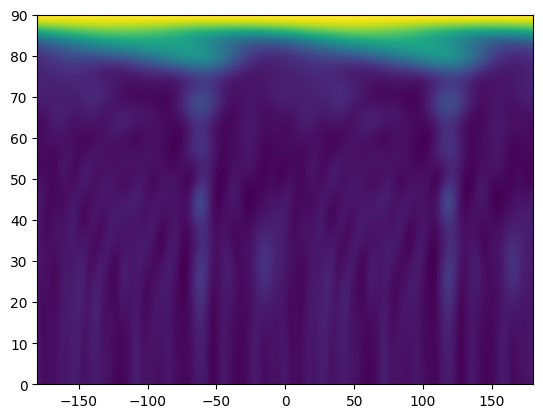

At time instant 1342.17728: o = 44, f = 89.5.


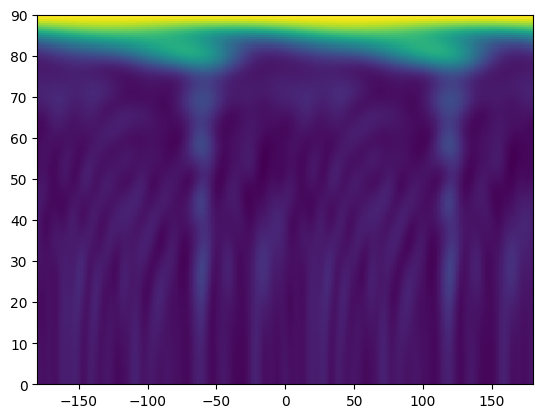

At time instant 1426.06336: o = -128, f = 89.5.


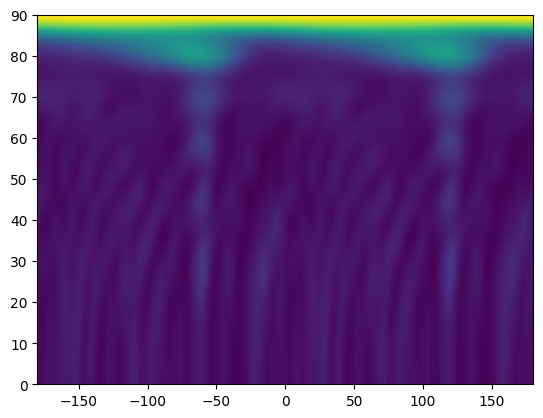

At time instant 1509.94944: o = 74, f = 86.5.


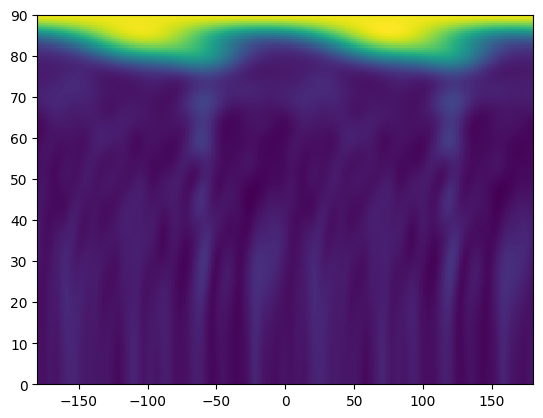

At time instant 1593.83552: o = 67, f = 89.5.


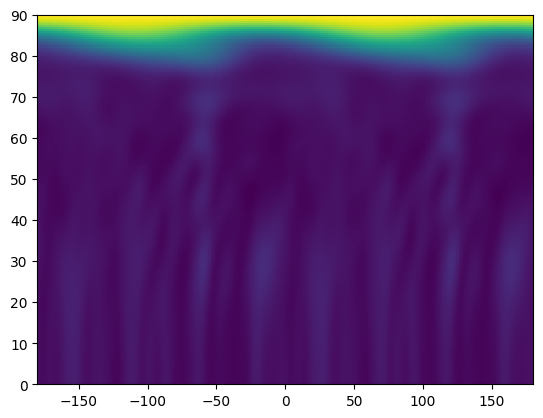

At time instant 1677.7216: o = -125, f = 89.5.


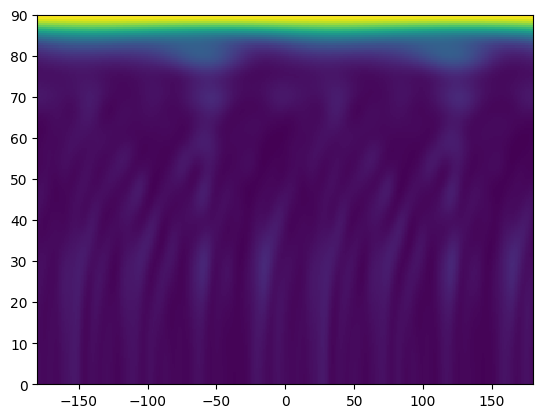

At time instant 1761.60768: o = 45, f = 89.5.


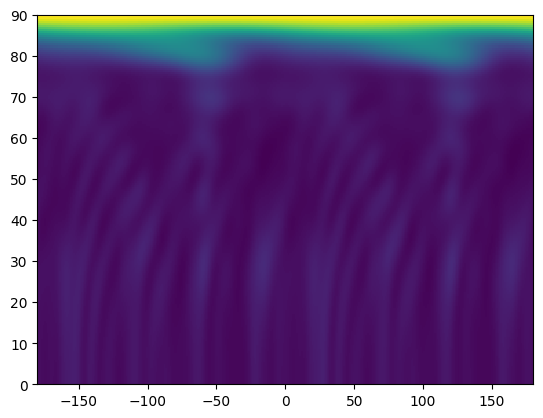

At time instant 1845.49376: o = 83, f = 89.5.


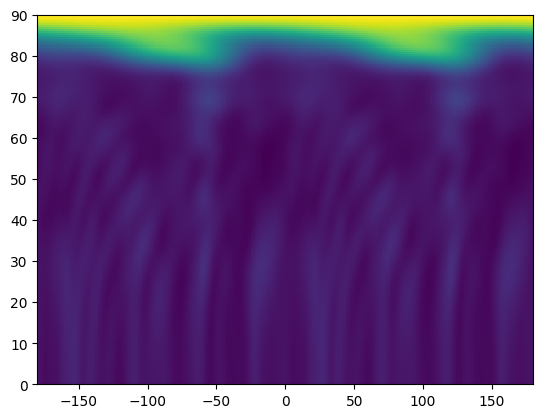

At time instant 1929.37984: o = 69, f = 89.5.


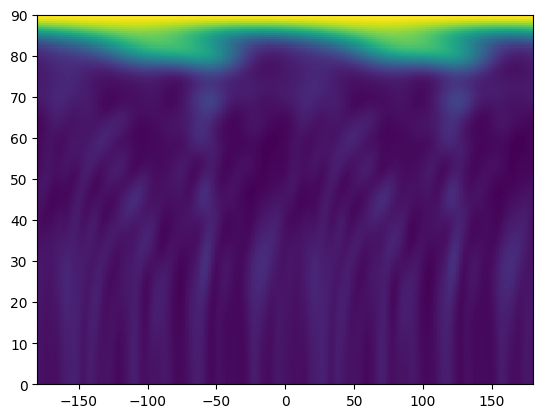

At time instant 2013.2659200000003: o = 57, f = 89.5.


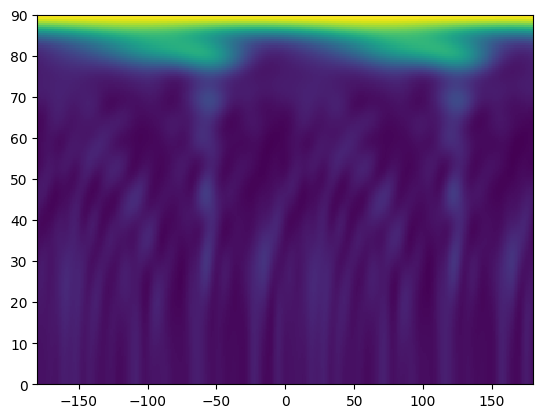

At time instant 2097.152: o = 5, f = 89.5.


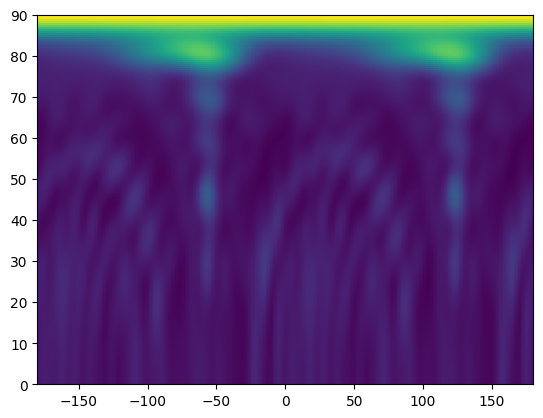

At time instant 2181.0380800000003: o = 29, f = 89.5.


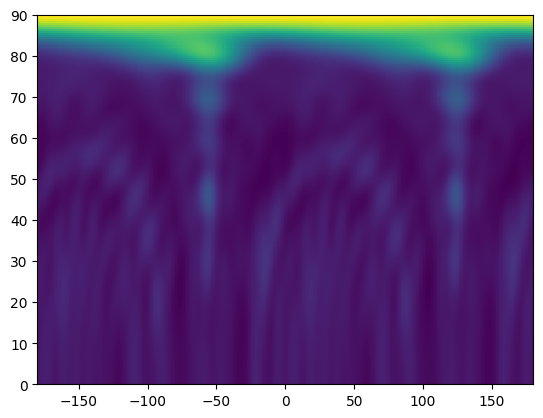

At time instant 2264.92416: o = 14, f = 89.5.


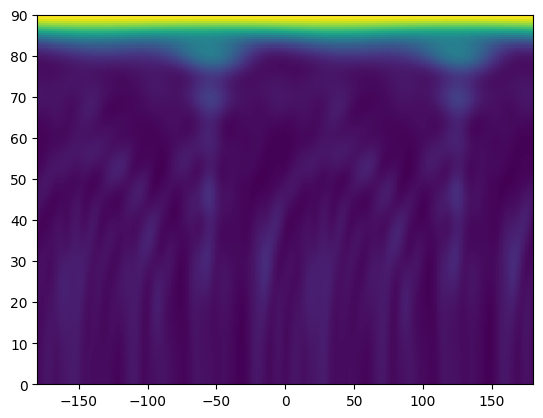

At time instant 2348.8102400000002: o = 38, f = 89.5.


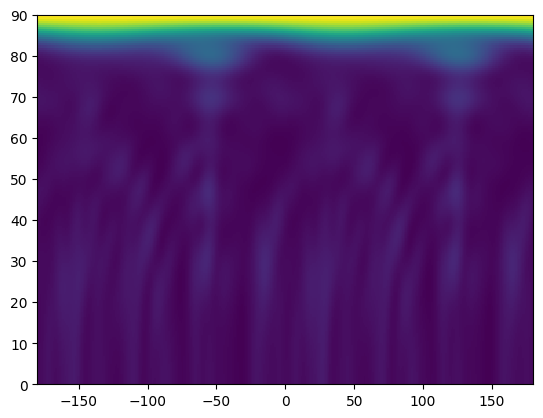

At time instant 2432.69632: o = 46, f = 89.5.


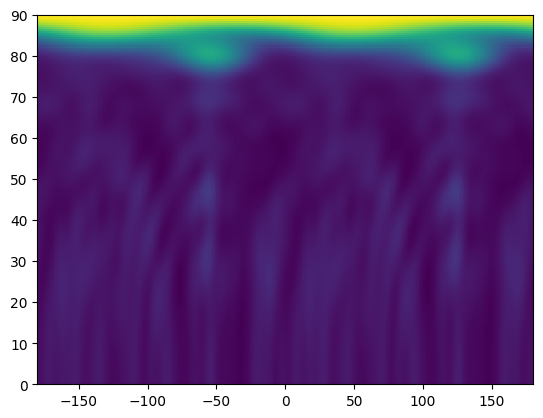

At time instant 2516.5824000000002: o = 61, f = 89.5.


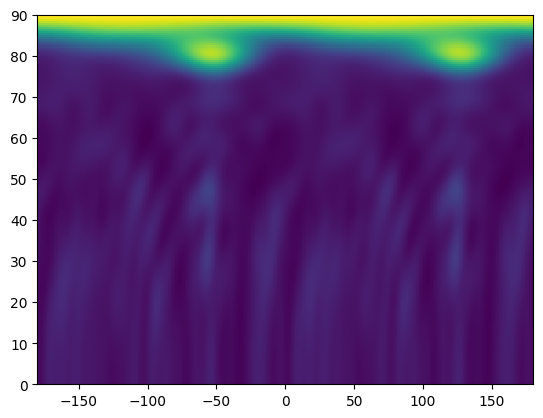

At time instant 2600.46848: o = -53, f = 80.5.


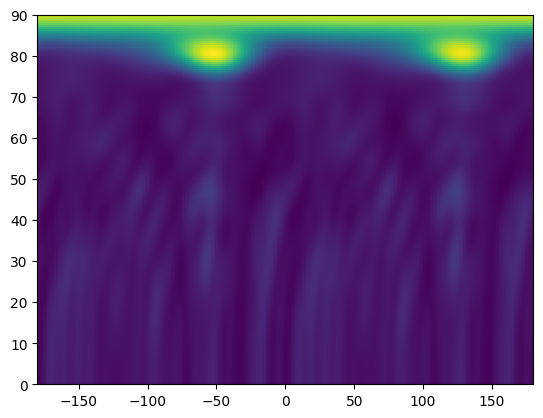

At time instant 2684.35456: o = -52, f = 80.5.


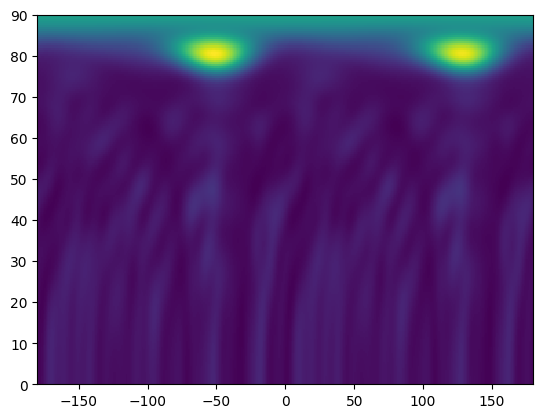

At time instant 2768.2406400000004: o = -52, f = 80.5.


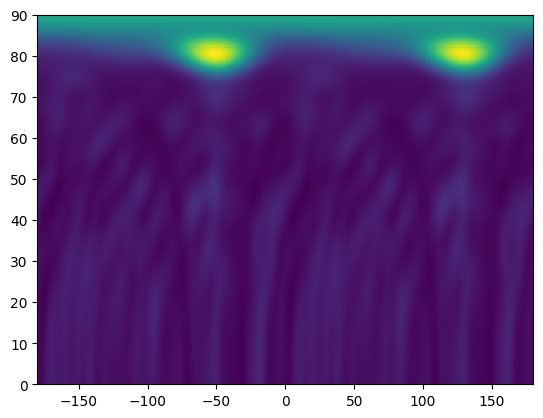

At time instant 2852.12672: o = -51, f = 80.5.


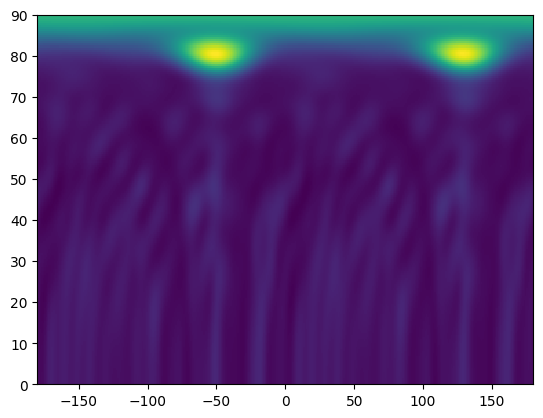

At time instant 2936.0128000000004: o = -50, f = 80.5.


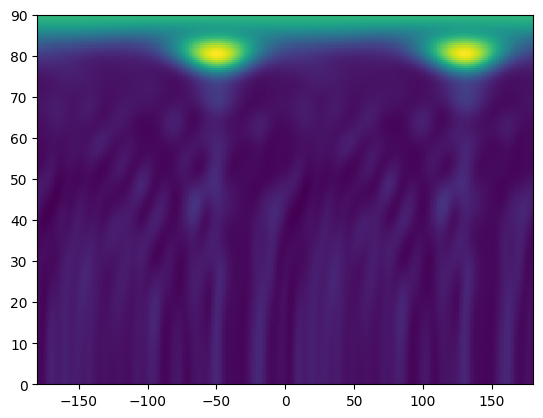

At time instant 3019.89888: o = -50, f = 80.5.


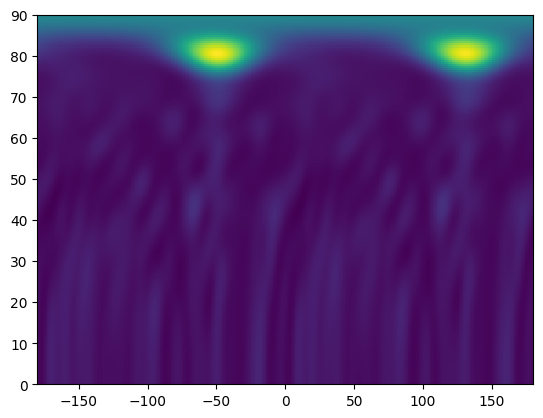

At time instant 3103.7849600000004: o = -49, f = 80.5.


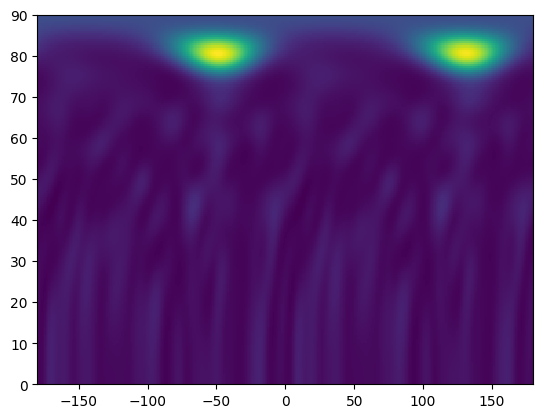

At time instant 3187.67104: o = -49, f = 80.5.


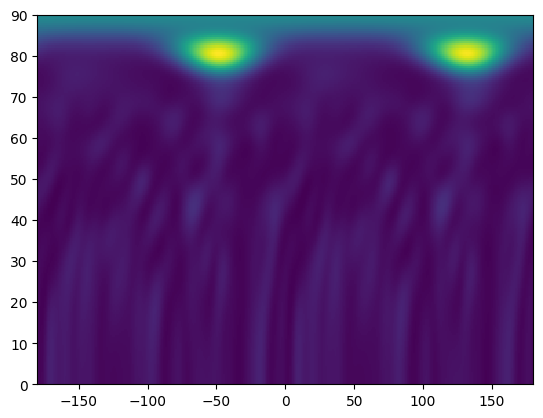

At time instant 3271.5571200000004: o = -48, f = 80.5.


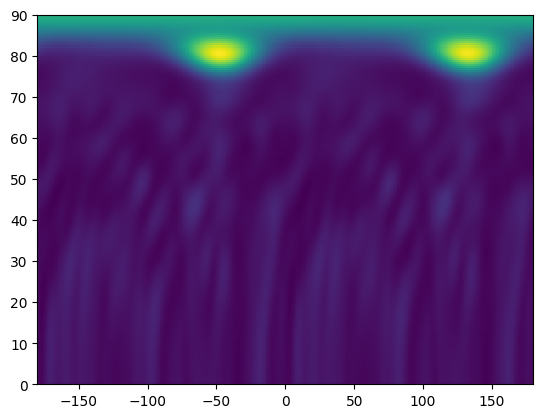

At time instant 3355.4432: o = -47, f = 81.0.


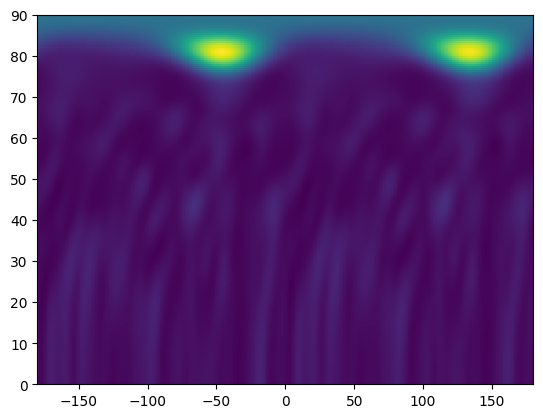

At time instant 3439.3292800000004: o = -45, f = 81.0.


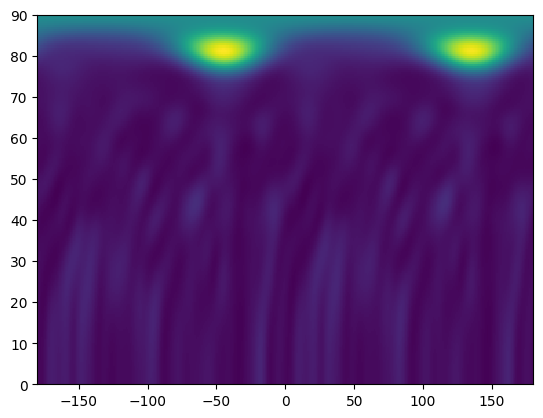

At time instant 3523.21536: o = -44, f = 81.0.


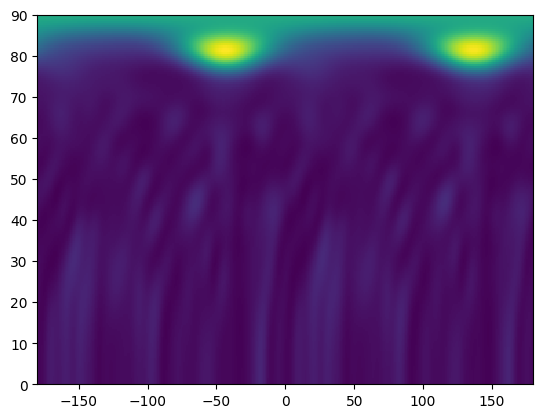

At time instant 3607.1014400000004: o = -43, f = 81.5.


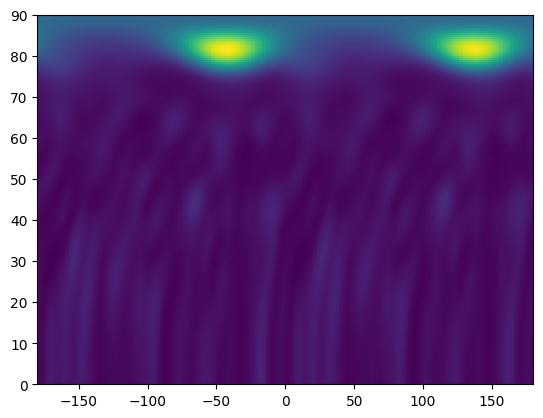

At time instant 3690.98752: o = -42, f = 81.5.


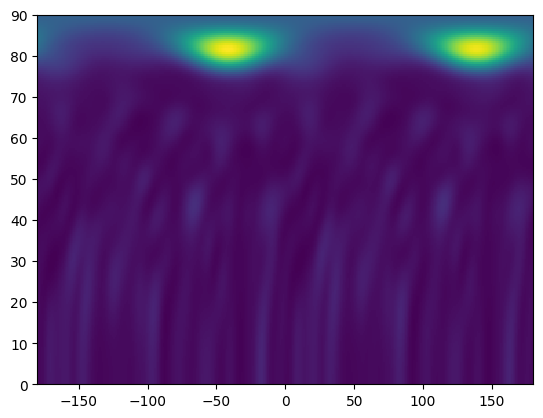

At time instant 3774.8736000000004: o = -41, f = 81.5.


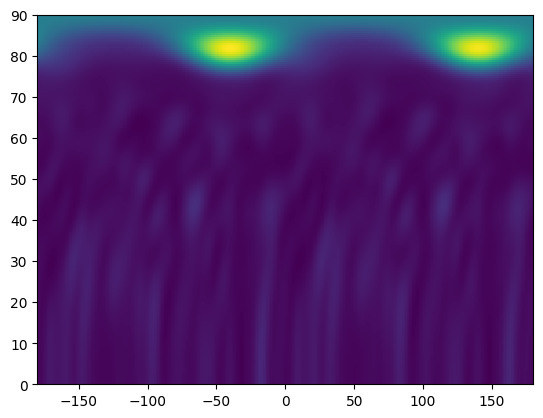

At time instant 3858.75968: o = -41, f = 82.0.


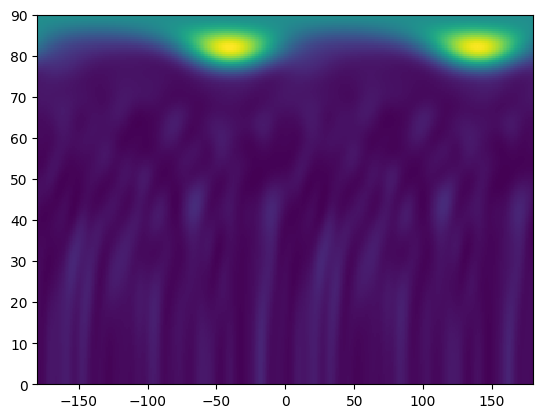

At time instant 3942.6457600000003: o = -40, f = 82.0.


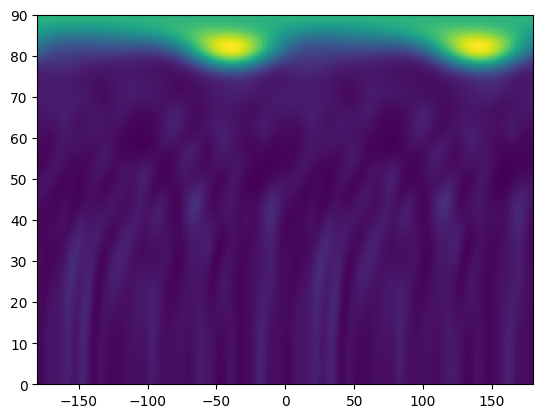

At time instant 4026.5318400000006: o = 143, f = 82.5.


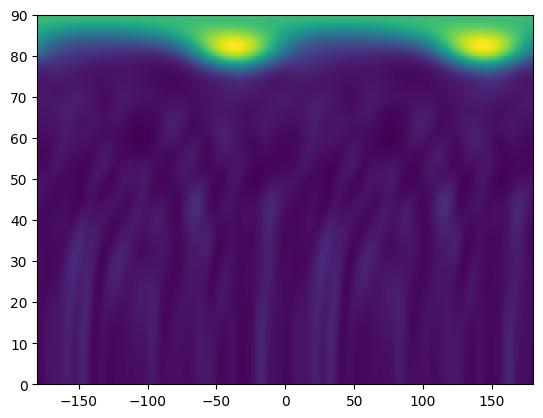

At time instant 4110.417920000001: o = -36, f = 82.0.


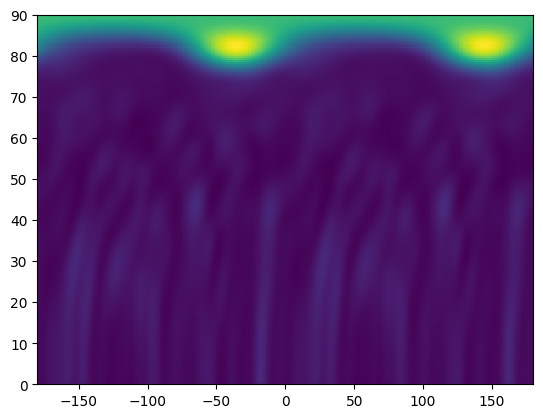

At time instant 4194.304: o = -36, f = 82.0.


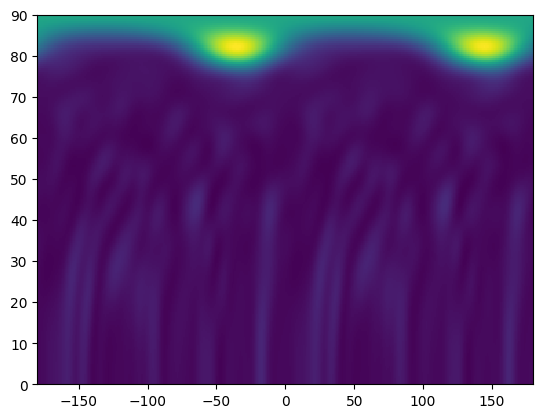

At time instant 4278.19008: o = -34, f = 82.0.


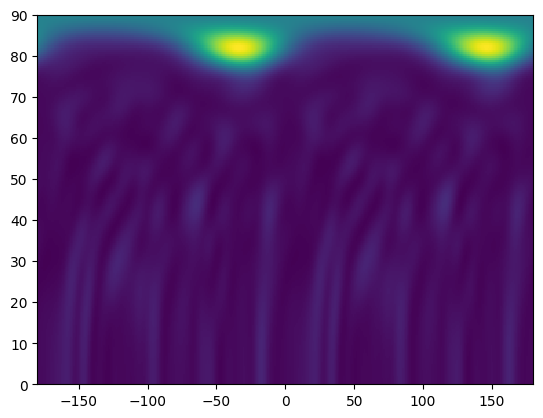

At time instant 4362.0761600000005: o = -32, f = 81.5.


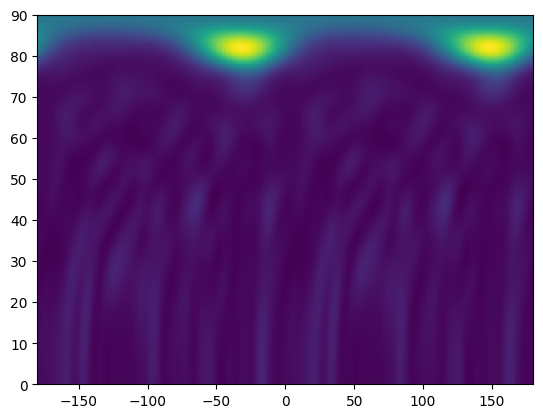

At time instant 4445.962240000001: o = -31, f = 82.0.


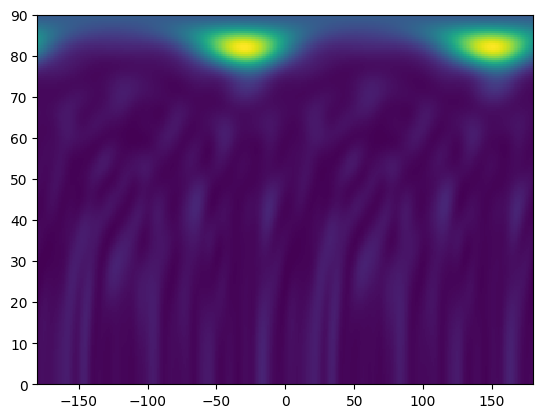

At time instant 4529.84832: o = -29, f = 81.5.


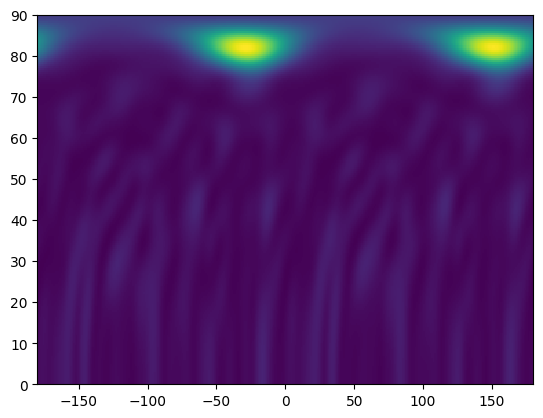

At time instant 4613.7344: o = -28, f = 81.5.


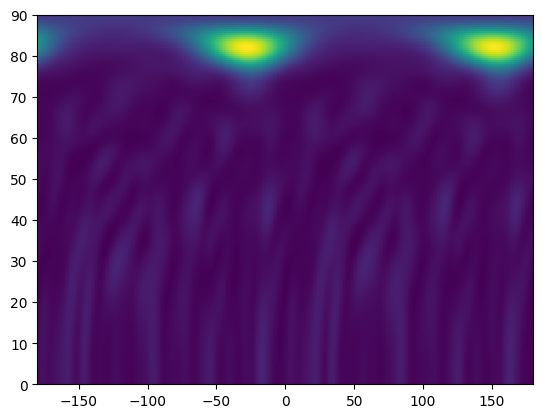

At time instant 4697.6204800000005: o = -27, f = 81.5.


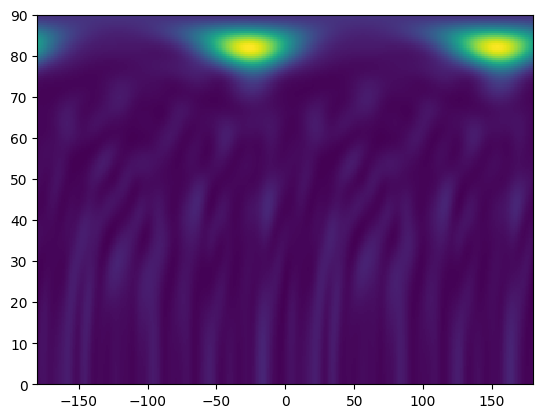

At time instant 4781.506560000001: o = -25, f = 81.5.


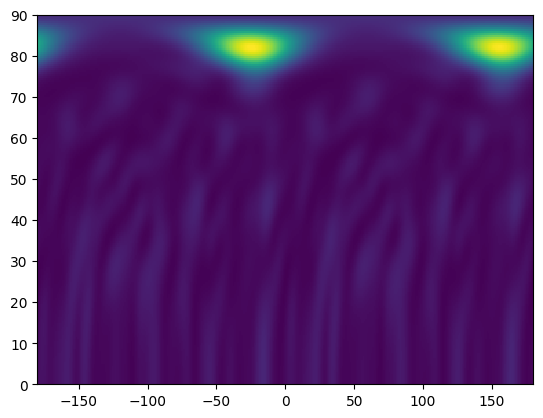

At time instant 4865.39264: o = -23, f = 82.0.


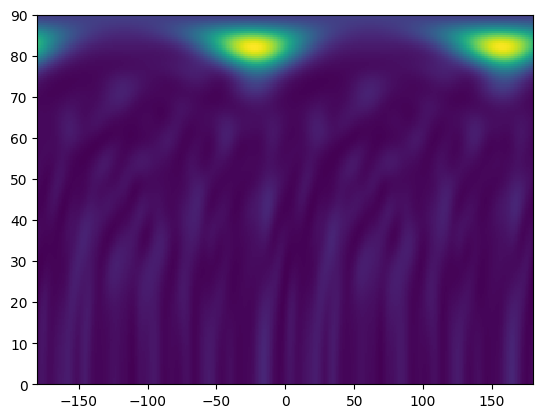

At time instant 4949.27872: o = -22, f = 82.0.


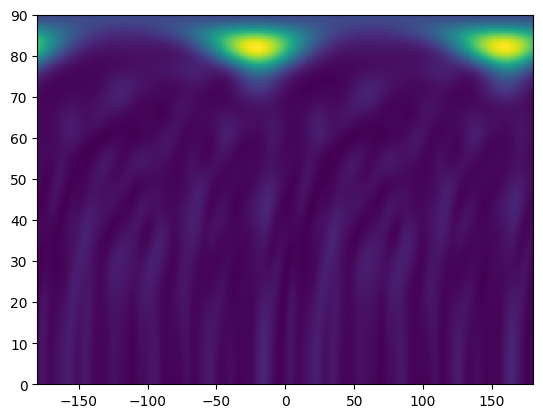

At time instant 5033.1648000000005: o = -20, f = 82.0.


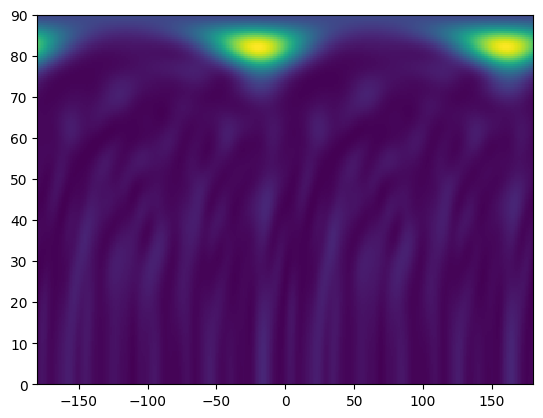

At time instant 5117.050880000001: o = -19, f = 82.0.


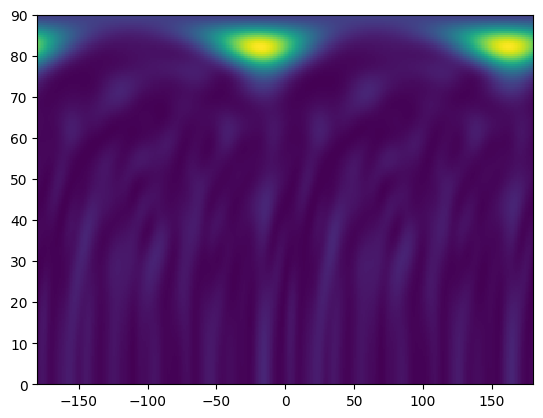

At time instant 5200.93696: o = -17, f = 82.0.


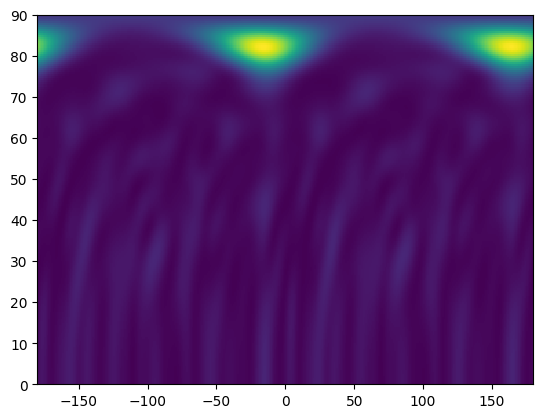

At time instant 5284.82304: o = -15, f = 82.0.


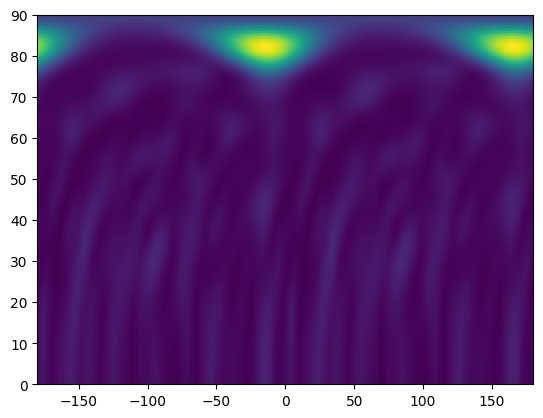

At time instant 5368.70912: o = -13, f = 82.0.


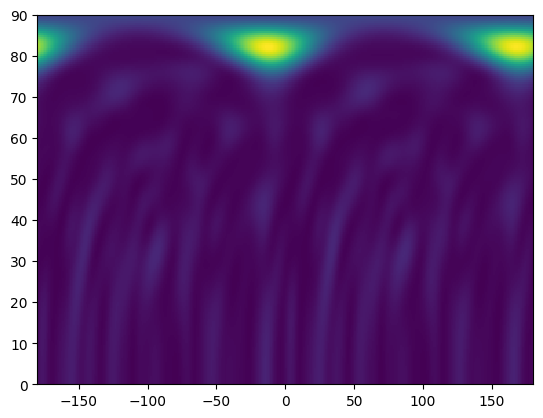

At time instant 5452.595200000001: o = -11, f = 82.0.


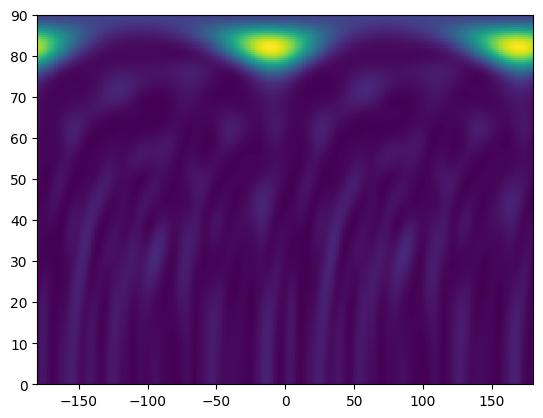

At time instant 5536.481280000001: o = -10, f = 82.0.


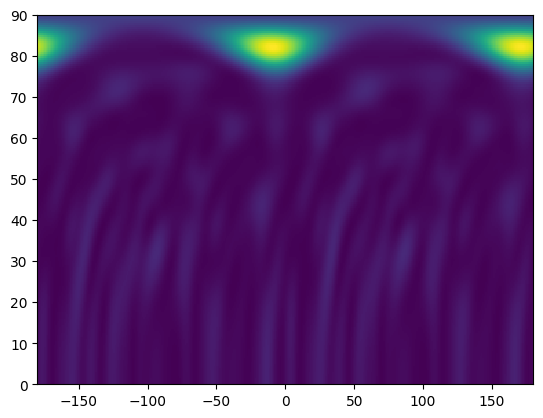

At time instant 5620.36736: o = -8, f = 82.0.


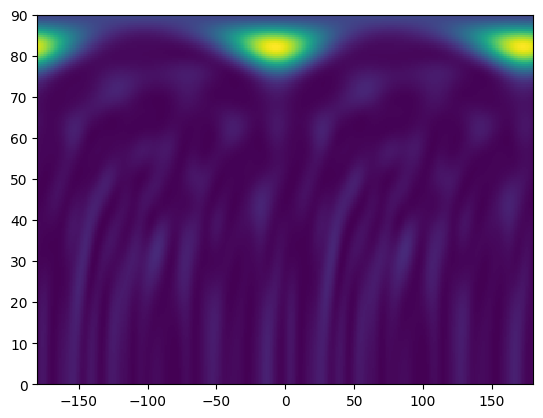

At time instant 5704.25344: o = -6, f = 82.0.


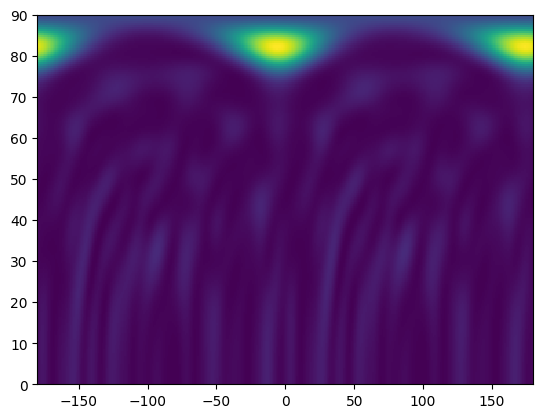

At time instant 5788.139520000001: o = -5, f = 82.0.


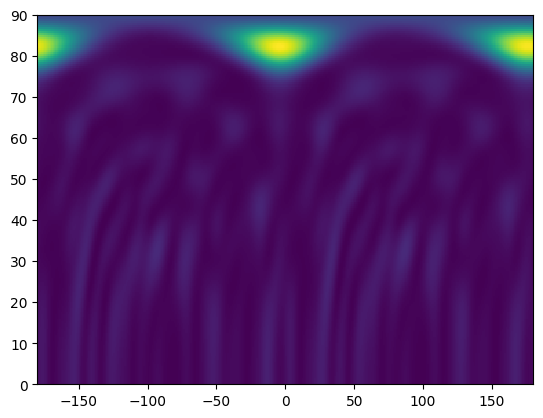

At time instant 5872.025600000001: o = -3, f = 82.0.


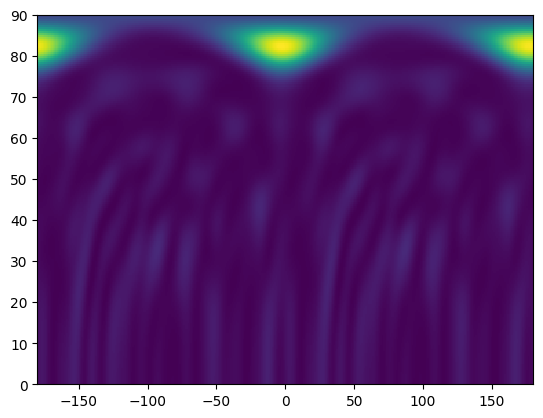

At time instant 5955.91168: o = -1, f = 82.0.


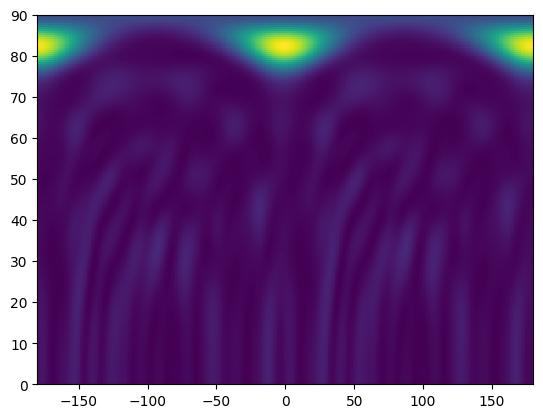

At time instant 6039.79776: o = 0, f = 82.0.


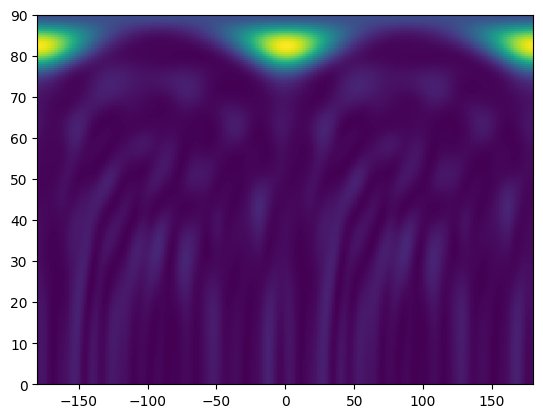

At time instant 6123.683840000001: o = 2, f = 82.5.


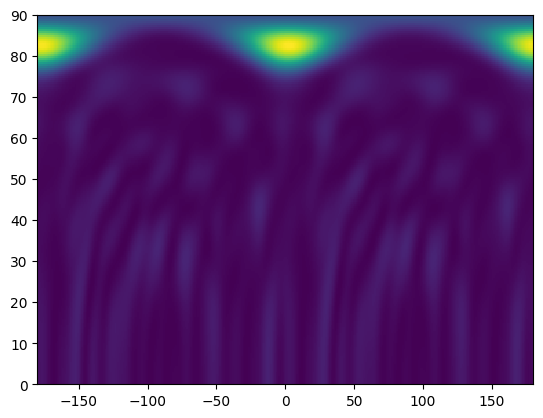

At time instant 6207.569920000001: o = 4, f = 82.5.


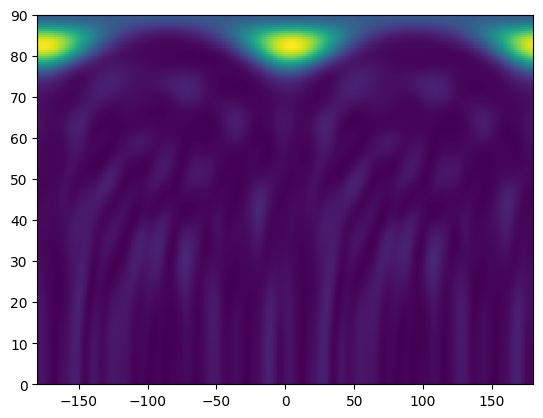

At time instant 6291.456: o = 6, f = 82.5.


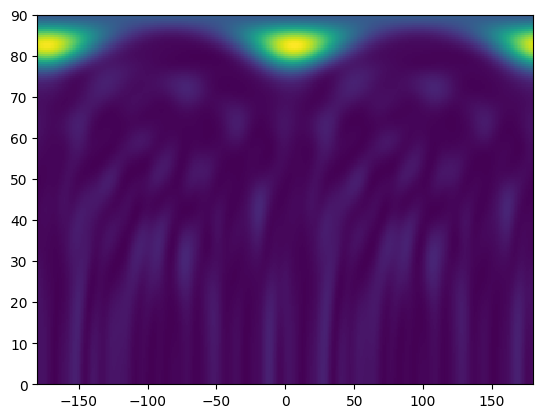

At time instant 6375.34208: o = 8, f = 82.5.


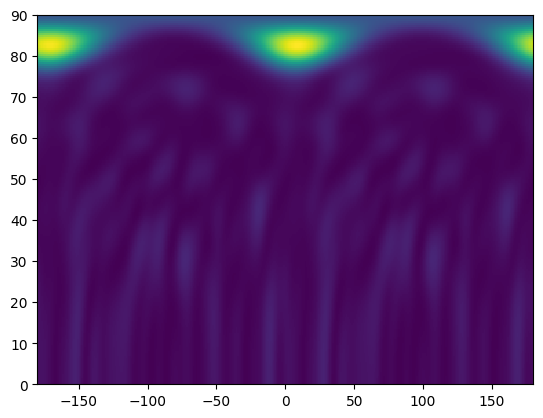

At time instant 6459.228160000001: o = 10, f = 82.5.


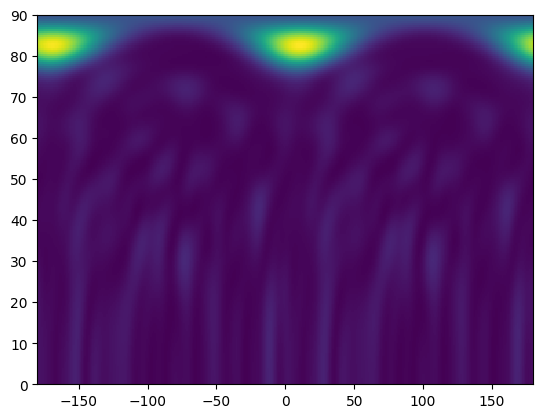

At time instant 6543.114240000001: o = 11, f = 82.5.


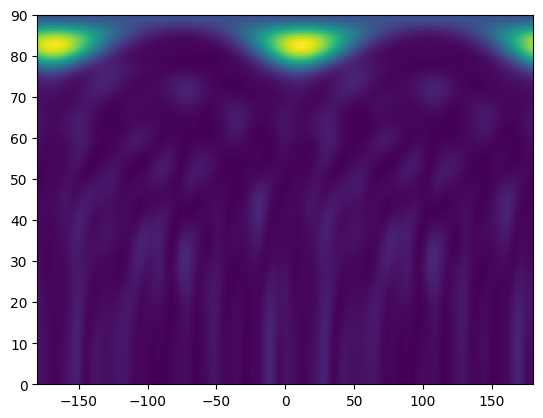

At time instant 6627.00032: o = 13, f = 82.5.


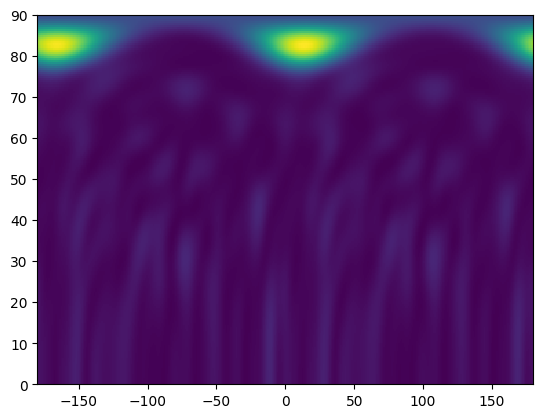

At time instant 6710.8864: o = 15, f = 82.5.


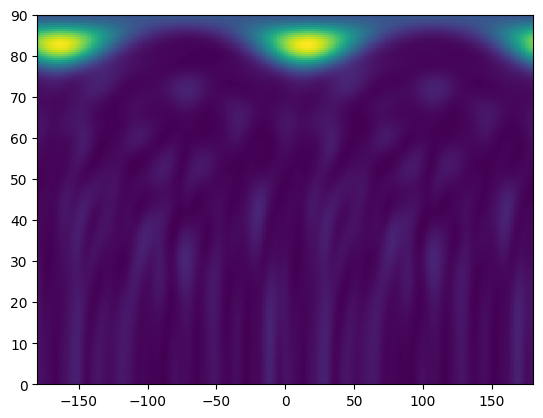

At time instant 6794.7724800000005: o = 18, f = 82.5.


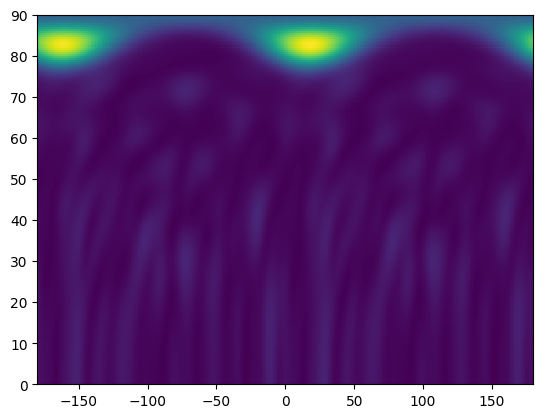

At time instant 6878.658560000001: o = 19, f = 82.5.


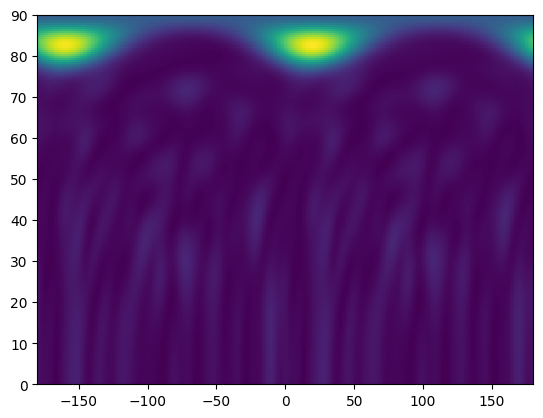

At time instant 6962.544640000001: o = 21, f = 82.5.


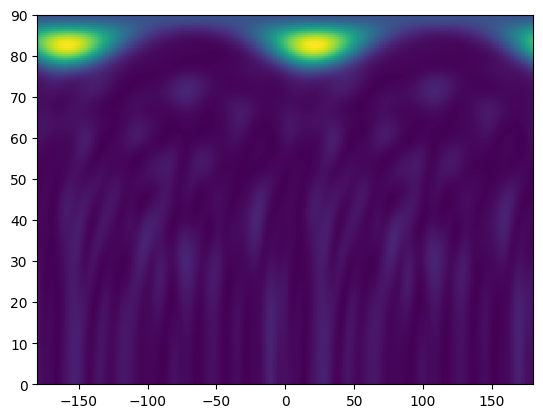

At time instant 7046.43072: o = 23, f = 82.5.


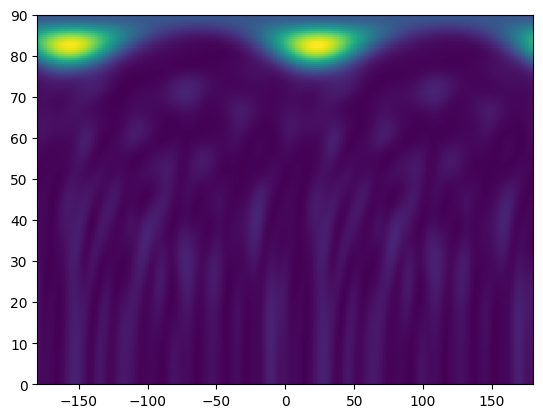

At time instant 7130.3168000000005: o = 24, f = 82.5.


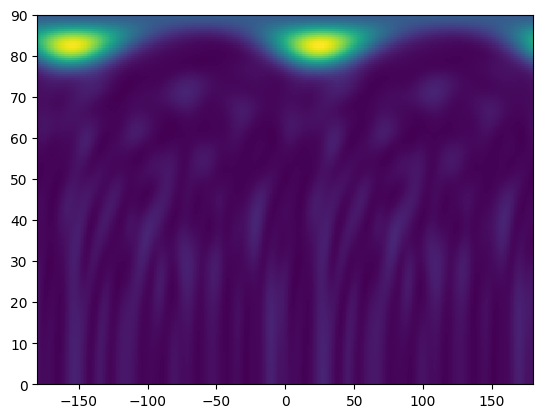

At time instant 7214.202880000001: o = 25, f = 82.5.


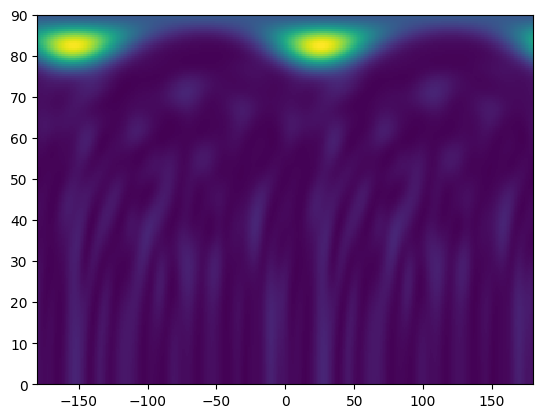

At time instant 7298.088960000001: o = 27, f = 82.5.


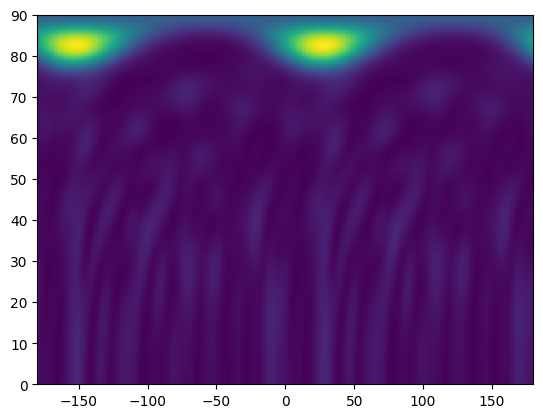

At time instant 7381.97504: o = 28, f = 82.5.


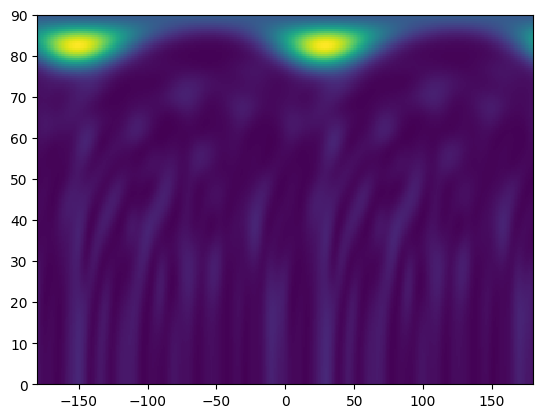

At time instant 7465.8611200000005: o = 29, f = 82.0.


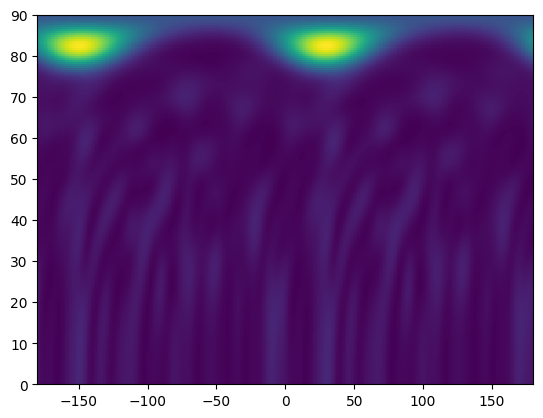

At time instant 7549.747200000001: o = 31, f = 82.0.


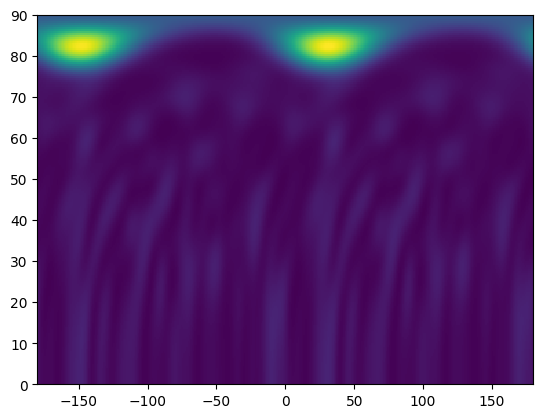

At time instant 7633.633280000001: o = 33, f = 82.0.


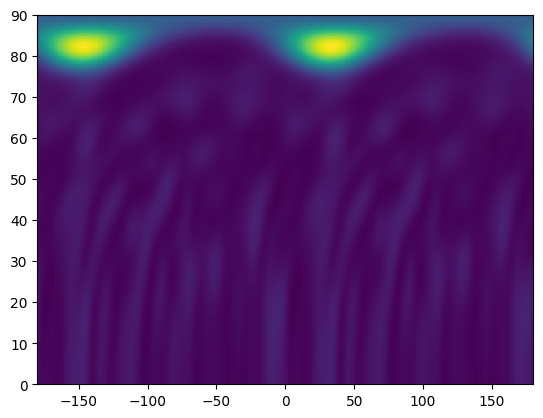

At time instant 7717.51936: o = 35, f = 82.0.


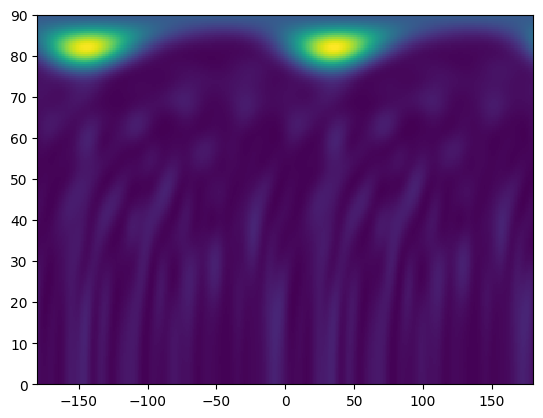

At time instant 7801.40544: o = 36, f = 82.0.


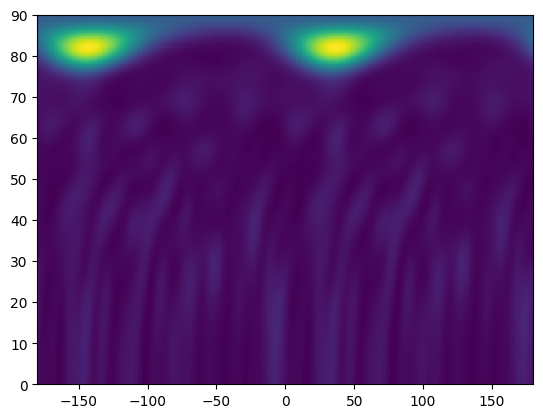

At time instant 7885.291520000001: o = 37, f = 82.0.


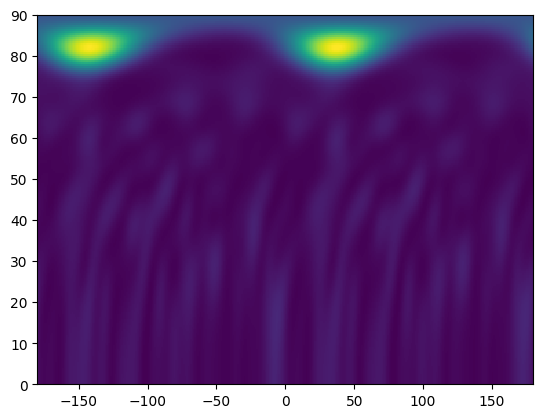

At time instant 7969.177600000001: o = 38, f = 81.5.


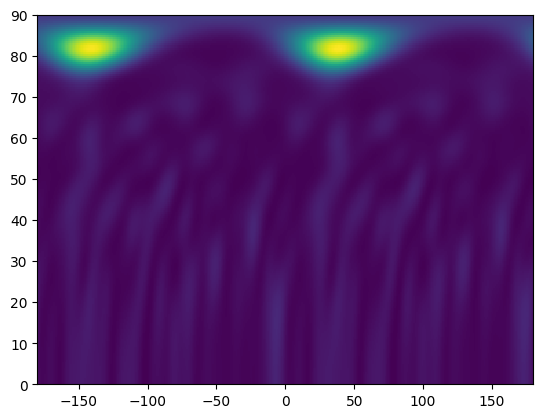

At time instant 8053.063680000001: o = 40, f = 81.5.


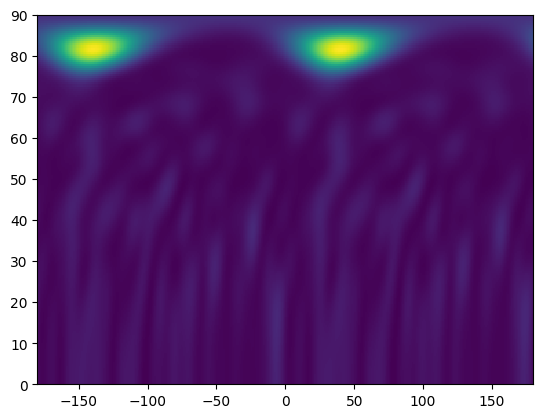

At time instant 8136.94976: o = 41, f = 81.5.


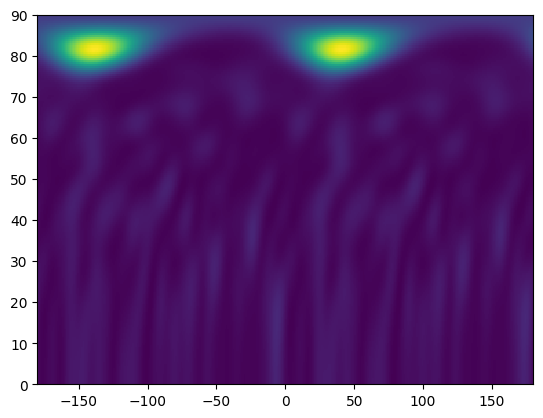

At time instant 8220.835840000002: o = 41, f = 81.5.


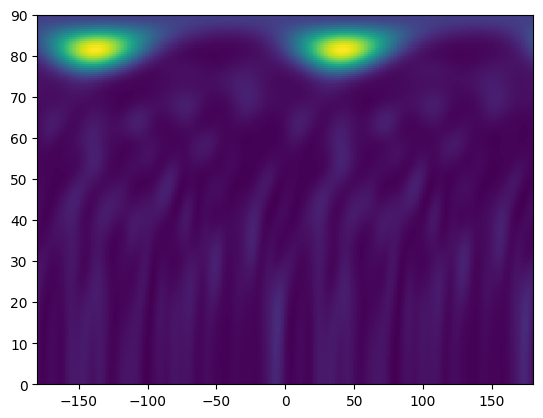

At time instant 8304.72192: o = 42, f = 81.0.


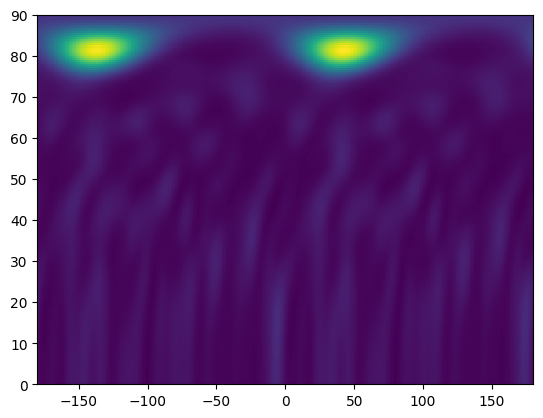

At time instant 8388.608: o = 43, f = 81.0.


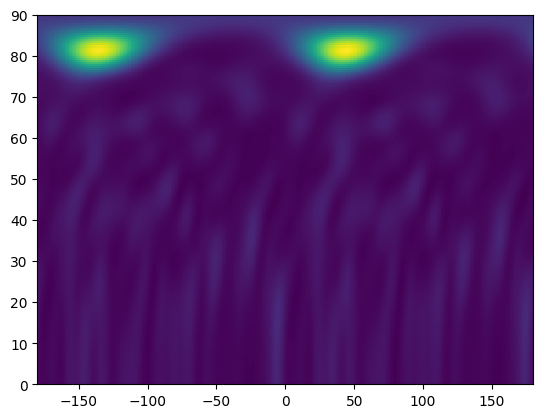

In [44]:
#Apply the beamforming fomrula

wind = 4096

for i in range(0, len(p) - wind, wind//2):
    p_fft = np.fft.fft(p[i:i+wind].T)
    p_star = np.conj(p_fft)

    aux = p_fft @ p_star.T

    for j in range(len(grid)):
        g_star = np.conjugate(grid[j].g)
        g_norm_squared = (np.linalg.norm(grid[j].g))**2
        aux2 = aux.T @ g_star
        aux3 = aux2 @ grid[j].g
        grid[j].beam = (aux3/g_norm_squared)
    
    beam_map = np.zeros((len(y_axis)-1, len(x_axis)-1))
    index = 0

    for j in range(len(y_axis)-1):
        for k in range(len(x_axis)-1):
            beam_map[j][k] = grid[index].beam
            index += 1
    
    #Printing
    max_value = 0
    x_max = 0
    y_max = 0
    for j in range(len(grid)):
        if grid[j].beam > max_value:
            x_max = grid[j].theta
            y_max = grid[j].phi
            max_value = grid[j].beam
        
    print(f"At time instant {wind/50000*i/2}: o = {x_max}, f = {y_max}.")      

    #Plotting    
        
    fig, ax = plt.subplots()
    ax.pcolormesh(x_axis, y_axis, beam_map)
    #fig.canvas.manager.set_window_title(f"Time instant {0.00002*i}")
    plt.show()
    if i/wind == 50:
        break
